In [4]:
file_name = "another_configuration_mappnig_test.ipynb"
import sys
import os
sys.path.insert(0, os.path.abspath(
    os.path.join(os.path.dirname(file_name), '../../src/') ))

from configuration_space_mapping import *
from utils import *

import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

In [5]:
client_id = connect_2_sim()
test_connection(client_id)

Connected to remote API server
Number of objects in the scene:  42


In [6]:
scene_objects = ['Cuboid_0','Cuboid_1','Cuboid_2',
                 'Cuboid_3','Cuboid_4','./dr20']
robot_name = './dr20'
lista_de_vertices = mapping(client_id=client_id, scene_objects=scene_objects, robot_name=robot_name)

points bounding box around robot: [array([-1.87693099,  1.61671551, -0.01701797]), array([-1.87692271,  1.84218409, -0.01702323]), array([-2.17384976,  1.84219502, -0.01642485]), array([-2.17385805,  1.61672644, -0.0164196 ])]
normals bounding box around robot: [6.283114572359596, 1.5707255919750098, 3.14152191877001, 4.712318245564596]
inverted normals bounding box around robot: [3.141521918769802, 4.712318245564803, 6.2831145723598025, 1.5707255919748027]
 
points bounding box around cuboid0: [array([-1.47499979e+00,  5.00000358e-01,  6.03572931e-08]), array([-1.97499979e+00,  5.00000358e-01,  6.03617615e-08]), array([-1.97499979e+00,  3.58382751e-07,  5.88519965e-08]), array([-1.47499979e+00,  3.58382751e-07,  5.88475281e-08])]
normals bounding box around cuboid0: [1.57079632981453, 3.1415926566095296, 4.71238898340453, 3.019529959402689e-09]
 
        normals  normal_order owner
7  3.019530e-09             4     o
3  1.570726e+00             4     r
4  1.570796e+00             1   

In [7]:
v_list_np = np.array(lista_de_vertices)

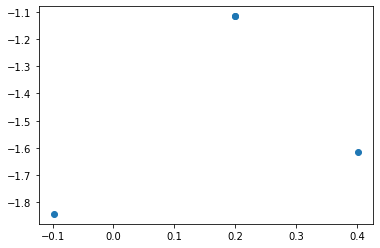

In [8]:
plt.scatter(v_list_np[:,0], v_list_np[:,1])

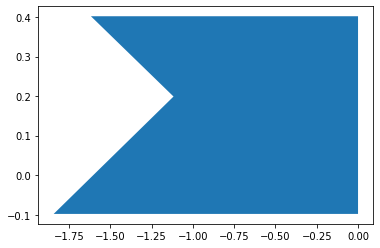

In [9]:
plt.fill_betweenx(v_list_np[:,0],v_list_np[:,1])

# Debugging `mapping_loop()`

In [16]:
global_coordinates_cuboid = [np.array([-1.47499979e+00,  5.00000360e-01,  6.24157246e-08]), 
                             np.array([-1.97499979e+00,  5.00000360e-01,  6.17008973e-08]), 
                             np.array([-1.97499979e+00,  3.60081535e-07,  5.67935650e-08]), 
                             np.array([-1.47499979e+00,  3.60081535e-07,  5.75083923e-08])]
global_coordin_corners_robot = [np.array([-1.8764059 ,  1.62417155, -0.01703672]), 
                                np.array([-1.87667144,  1.84963994, -0.01704005]), 
                                np.array([-2.17359744,  1.84929024, -0.01644217]), 
                                np.array([-2.1733319 ,  1.62382185, -0.01643884])]

data = {'normals':[9.814665e-09,1.117424e-03,1.570796e+00,1.571914e+00,3.141593e+00,3.142710e+00,4.712389e+00,4.713506e+00], 
        'normal_order':[4,3,1,4,2,1,3,2],
        'owner':['o','r','o','r','o','r','o','r']}

dframe = pd.DataFrame.from_dict(data)                                

In [21]:
a = mapping_loop(dframe=dframe, corners_robot=global_coordin_corners_robot, corners_obstacle=global_coordinates_cuboid)
a_np = np.array(a)

o -> r | b4-a3
r -> o | b1-a3
o -> r | b1-a4
r -> o | b2-a4
o -> r | b2-a1
r -> o | b3-a1
o -> r | b3-a2
r -> o | b4-a2


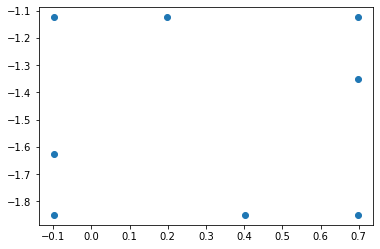

In [25]:
plt.scatter(a_np[:,0],a_np[:,1])